---
## Fifth exercise
*Do I hit the target?*

*Our fantastic Office Manager Charlotte has organized a competition between travel audience employees for the company  summer event 2015: the goal of the game is to hit with a ball a target located on the wall. The first six people have obtained the following results:*

Player | Shots | Hits
---|---|---
Kathrin | 100 | 1
Arnaud | 300 | 1
Jan | 50 | 10
Maria | 200 | 2
Cristina | 100 | 0
Dominik | 150 | 4

*Now it is the turn of Antje.*
 
*What is the probability (based on previous employees results) that she will hit the target?*
 
*Take into consideration the followings:*
- *the number of shots between players is unbalanced*
- *some players may have been cheating*

---

In [1]:
import numpy as np
from scipy.stats import binom
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will first **explore the data to remove the outliers (the cheaters):**

In [2]:
# load the data in a dict
results = {"Kathrin": [100,1], "Arnaud": [300,1], "Jan": [50,10],
           "Maria": [200,2], "Cristina": [100,0], "Dominik": [150,4]}

In [3]:
# calculate the skill (hits/shots) of each player
print ("%-*s %s \t %s \t %s \n" % (12,"Player", "Shots", "Hits", "Skill"))
for person in results:
    skill = float(results[person][1]) / results[person][0]
    results[person].append(skill)
    print("%-*s %i \t %i \t %.2f" % (12, person, results[person][0], results[person][1], results[person][2]))

Player       Shots 	 Hits 	 Skill 

Kathrin      100 	 1 	 0.01
Arnaud       300 	 1 	 0.00
Jan          50 	 10 	 0.20
Dominik      150 	 4 	 0.03
Cristina     100 	 0 	 0.00
Maria        200 	 2 	 0.01


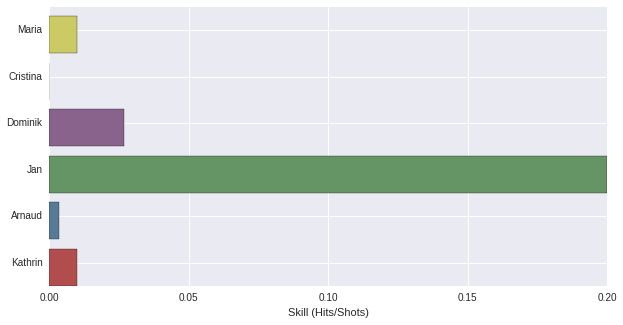

In [4]:
# plot the skill of each player (who is cheating?)
x = np.arange(len(results))
skills = [results[person][2] for person in results]
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(x, skills, color=sns.color_palette("Set1", len(results), desat=.5))
ax.set_yticks(x + 0.5)
ax.set_yticklabels([person for person in results])
ax.set_xlabel("Skill (Hits/Shots)")

Clearly, **Jan has been cheating**. As we will base the probability that Antje will hit the target on previous employees results, it's better to remove Jan from the data.

We have detected the cheater **visually**. We will now do that **numerically**, applying a basic detection of outliers based on the interquartile range.

In [5]:
q75, q25 = np.percentile(skills, [75 ,25])
iqr = q75 - q25
max_skill = q75+(iqr*1.5)
cheaters = [person for person in results if results[person][2]>max_skill]
print cheaters

['Jan']


So **let's remove Jan**...

In [6]:
del results["Jan"]

... and do some descriptive statistics with the clean dataset:

In [7]:
shots = [results[person][0] for person in results]
hits = [results[person][1] for person in results]
skills = [results[person][2] for person in results]
print "The average player:\n---"
print("Shots: \t %i +- %i" % (round(np.mean(shots)),round(np.std(shots))))
print("Hits: \t %i +- %i" % (round(np.mean(hits)),round(np.std(hits))))
print("Skill:\t %.2f +- %.2f" % (np.mean(skills),np.std(skills)))

The average player:
---
Shots: 	 170 +- 75
Hits: 	 2 +- 1
Skill:	 0.01 +- 0.01


Now, we will **assume that Antje has the same average skill of her colleagues**.

Thus, the probability that Antje scores 1 hit from 1 shot is 1%.
$$p=0.01$$

However, if Antje shoots several times the probability of scoring 1 hit increases. Doing $n$ shots, the probability of hitting the target $k$ times follows the binomial distribution:

$$P(k) = \left( {\begin{array}{*{20}c} n \\ k \\ \end{array}} \right) p^k (1-p)^{n-k}$$

Assuming that Antje will try a number of shots equal to the average of attempts done by her colleagues ($n=170$), the probability that Antje will hit the target $k$ times is:

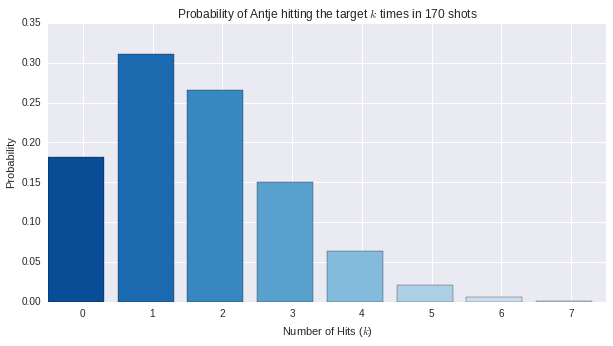

In [8]:
n = np.mean(shots)
p = np.mean(skills)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.9999, n, p))
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, binom.pmf(x, n, p), color=sns.color_palette("Blues_r", len(x)))
ax.set_xticklabels(x.astype(np.int))
ax.set_xticks(x + 0.5)
ax.set_xlabel("Number of Hits ($k$)")
ax.set_ylabel("Probability")
ax.set_title("Probability of Antje hitting the target $k$ times in %i shots" % n)

In [9]:
mean = n * p
sigma = ( n * p * (1-p) )**0.5
print("So most likely she will hit the target %i +/- %i times" % (round(mean),round(sigma)))

So most likely she will hit the target 2 +/- 1 times


And the probabilty that Antje hits the target at least 1 time in 170 attempts is:

In [10]:
prob_Antje_hits = np.sum(binom.pmf(x, n, p)[1:])
print("%.2f" % prob_Antje_hits)

0.82


So there is an **82% of probability that Antje will hit the target** if she tries the average number of attempts of her colleagues.

This was the answer we were looking for. It looks like Antje will probably hit the target now that her turn has arrived. Let's go Antje!

As an **extra**, we will now calculate this probability for any number of attempts $n$ than Antje may try:

In [11]:
ns = np.arange(0,301,1)
probs_min1hit = []
for n in ns:
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.9999, n, p)).astype(int)
    probs_min1hit.append(np.sum(binom.pmf(x, n, p)[1:]))
    #print("n=%i \t prob=%.5f" % (n, np.sum(binom.pmf(x, n, p)[1:])))

/data/anaconda/lib/python2.7/site-packages/scipy/stats/_discrete_distns.py:64: RuntimeWarning: floating point number truncated to an integer
  temp = special.bdtr(vals1, n, p)


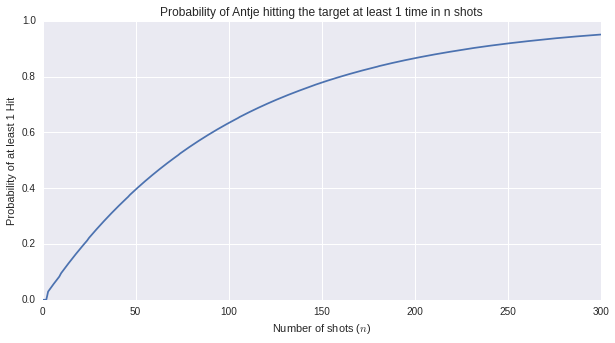

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ns, probs_min1hit)
ax.set_xlabel("Number of shots ($n$)")
ax.set_ylabel("Probability of at least 1 Hit")
ax.set_title("Probability of Antje hitting the target at least 1 time in n shots")

So Antje, don't despair if you don't hit! Just continue trying. If you try 300 shots, the probability you will hit is 95%.